# Clustering - 군집 분석

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## K-Means
[K-Means](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-7-K-%ED%8F%89%EA%B7%A0-%EA%B5%B0%EC%A7%91%ED%99%94-K-means-Clustering)
- 거리 기반 군집 알고리즘
k는 만들 그룹의 수를 말한다. k=3이면 해당 데이터셋을 3그룹으로 나눈다는 것이다.  

* k=3이면 일단 임의의 3 점을 잡고 거기에 가까운 애들끼리 그룹을 나눈다.   중심점을 각 그룹의 중심으로 바꿔준다(새로운 놈을 중심점으로 임명).  
* 바뀐 중심점을 기준으로 각각 가까운 애들끼리로 다시 그룹을 나눈다.  
중심점을 새로은 그룹의 중심으로 재정의해준다.  
그러다 중심점이 안 옮겨지는 정도까지 가면? 완성!  
* 한 그룹이 도넛의 중심, 다른 그룹이 도넛의 외곽에 있으면 잘 나누지 못하는 단점이 있다.

In [ ]:
!pip install mglearn
import mglearn

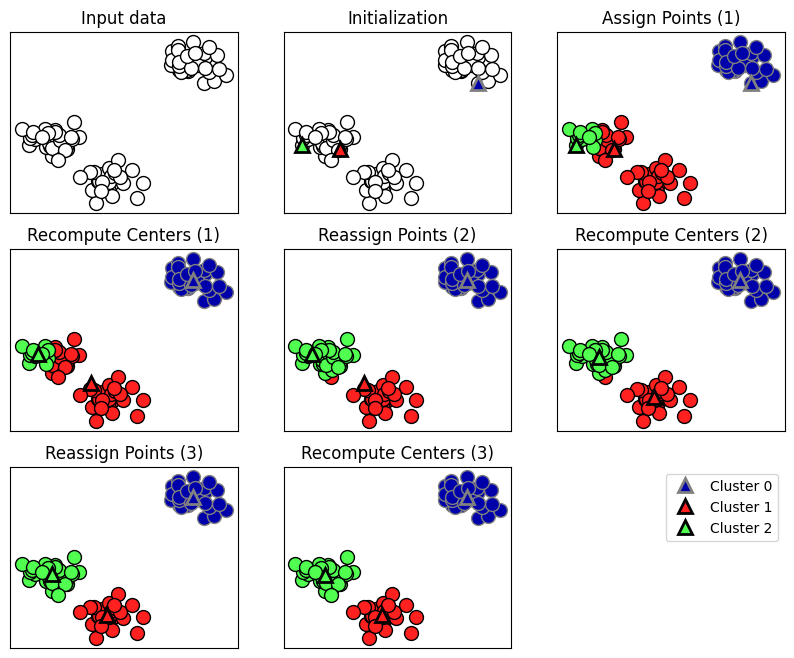

In [ ]:
# 입력 데이터와 k-평균 군집 알고리즘이 세번 진행되기까지의 과정
mglearn.plots.plot_kmeans_algorithm()

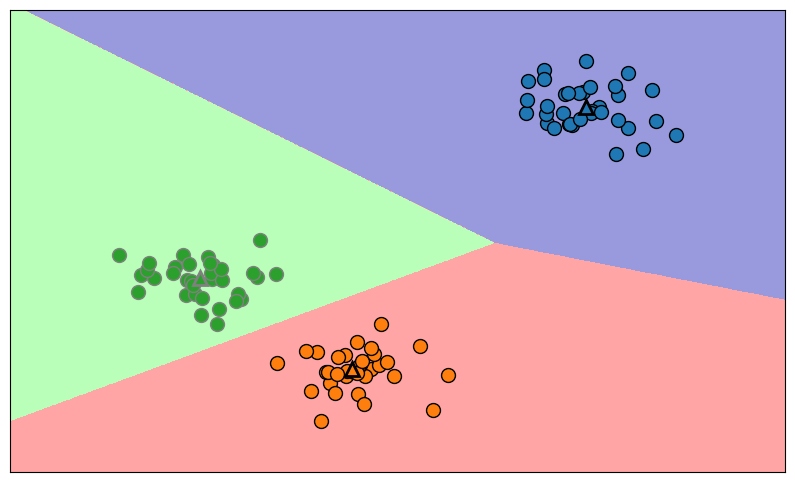

In [ ]:
# k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계
mglearn.plots.plot_kmeans_boundaries()

### K-Means 알고리즘

#### 데이터 생성

In [ ]:
from sklearn.datasets import make_blobs

# 2차원 데이터 생성
X, y = make_blobs(random_state=1)

#### K-Means 군집 모델 생성

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
print(kmeans.labels_)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [ ]:
# 군집 예측
print(kmeans.predict(X))

#너는 어떤 군집에 속해있니?

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [ ]:
# 각 군집 중심과의 거리
print(kmeans.transform(X))

#너는 각 군집의 중심으로부터 얼마나 떨어져있니? - 아래는 군집이 3개인 경우이며 첫번째 행은 2번 군집이겠군

[[ 2.33264915 11.01062651 11.79502525]
 [11.94628182  1.30953107  4.2295622 ]
 [13.29542634  1.51555754  6.11688819]
 [11.2031992   0.72516925  5.91263769]
 [13.1027226   7.14308111  2.05824293]
 [13.33464757  5.6898446   0.32564978]
 [13.72032135  5.89178517  0.35951702]
 [11.80140588  1.10800029  4.4505645 ]
 [ 1.77075008 11.90354354 14.24582247]
 [ 0.30010589 12.07923924 13.6239099 ]
 [13.09581555  1.70962896  4.32552707]
 [11.04182697  1.050102    6.28145612]
 [14.29521243  5.69020332  0.84256577]
 [ 1.99476647 12.55313864 14.86955931]
 [14.78382008  8.06840005  2.53779322]
 [13.11302145  5.69341254  0.55460029]
 [12.96803763  4.83623448  0.74506133]
 [ 1.16997408 10.69574674 12.47463058]
 [12.11189585  0.2964962   5.68372183]
 [12.59077962  1.04600567  6.293196  ]
 [13.24261116  5.38602399  0.27189107]
 [12.06266916  0.2231335   5.6243631 ]
 [13.85924467  5.61472573  0.3630465 ]
 [ 0.22244519 11.83683204 13.39737494]
 [12.60858701  0.80084832  5.21445653]
 [16.05055651  7.24052581

#### K-Means 군집 모델 - 클러스터 중심과 클러스터 할당

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

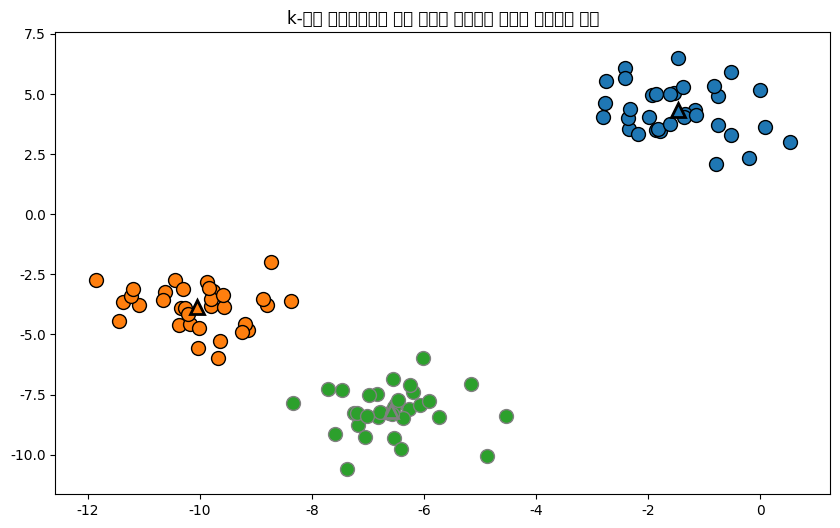

In [ ]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2],
    markers='^', markeredgewidth=2)

plt.title('k-평균 알고리즘으로 찾은 세개의 클러스터 중심과 클러스터 할당')
plt.show()

#### 클러스터 수 조정 - 2, 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


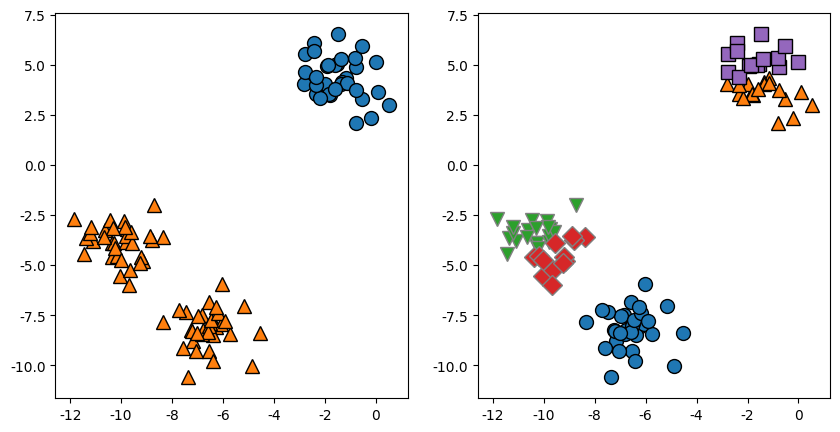

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])
plt.show()

### k-평균 알고리즘이 실패하는 경우  

거리 기반으로 한 점을 중심으로 원을 그리며 그룹을 생성하기 때문에 직선형이나 도넛형, 복잡한 모형에는 약하다.  

#### 1.2.1 밀도가 다른 데이터  

각 데이터마다 밀도가 다른 경우.  

A그룹은 촘촘한데, C그룹은 듬성듬성한 경우 이걸 잘 분류됐다고 할 수 있는가?

In [ ]:
# 데이터 생성
from sklearn.datasets import make_blobs

X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

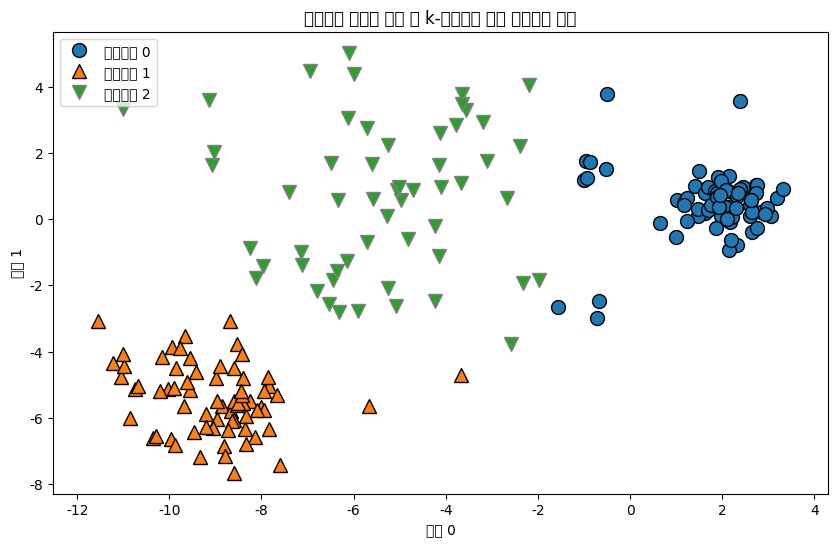

In [ ]:
# K-Means 알고리즘 적용
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)

plt.title('클러스터 밀도가 다를 때 k-평균으로 찾은 클러스터 할당')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.show()

#### 1.2.2 원형이 아닌 데이터

In [ ]:
# 무작위로 클러스터 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

In [ ]:
# 세 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

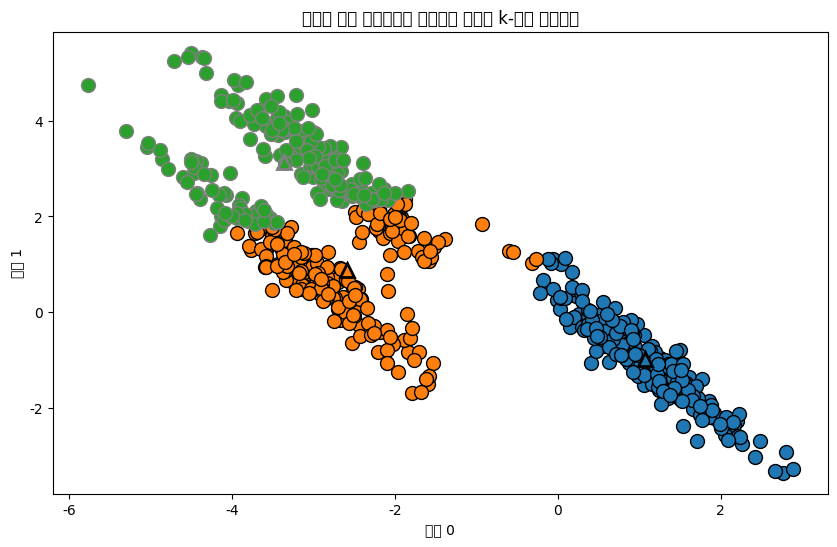

In [ ]:
# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2],
    markers='^', markeredgewidth=2)

plt.title('원형이 아닌 클러스터를 구분하지 못하는 k-평균 알고리즘')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#### 1.2.3 복잡한 모양의 데이터

In [ ]:
# two_moons 데이터를 생성(노이즈 추가)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [ ]:
# 두 개의 클러스터로 데이터에 K-Means 알고리즘 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

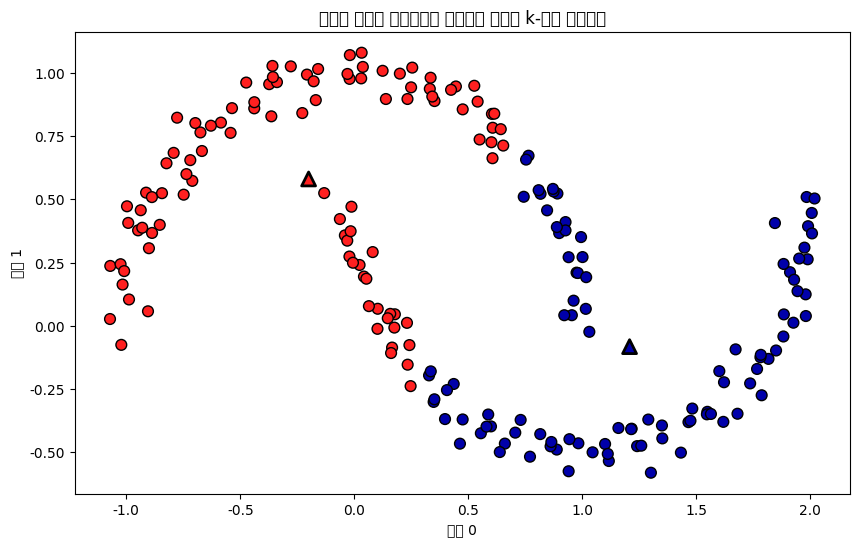

In [ ]:
# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')

plt.title('복잡한 모양의 클러스터를 구분하지 못하는 k-평균 알고리즘')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

## 병합군집(Agglomerative Clustering)
[병합군집](https://velog.io/@khsfun0312/Hierarchical-Clustering)  
k=3 식으로 그룹의 갯수를 정하고 들어가는 k-means와 달리 1단계에서는 각 데이터 하나하나가 개인 그룹이다.  

각 그룹에 가까운 애들끼리 병합하여 새 그룹을 형성한다.  

각 그룹에 가까운 애들끼리 병합하여 또 새 그룹을 형성한다...  

동일 방식으로 점차 큰 그룹을 생성해 나간다.  

결국 하나의 그룹으로 병합되게 되는데, 원하는 수준에서 병합을 끊으면 된다.  

---

#### linkage 옵션
- ward: 기본값인 ward 연결은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 병합. 크기가 비교적 비슷한 클러스터 생성
- average: 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 병합
- complete: 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 병합


### 병합 군집 진행 과정
mglearn.plots.plot_agglomerative_algorithm()

#### 병합군집(Agglomerative Clustering)

In [ ]:
# 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

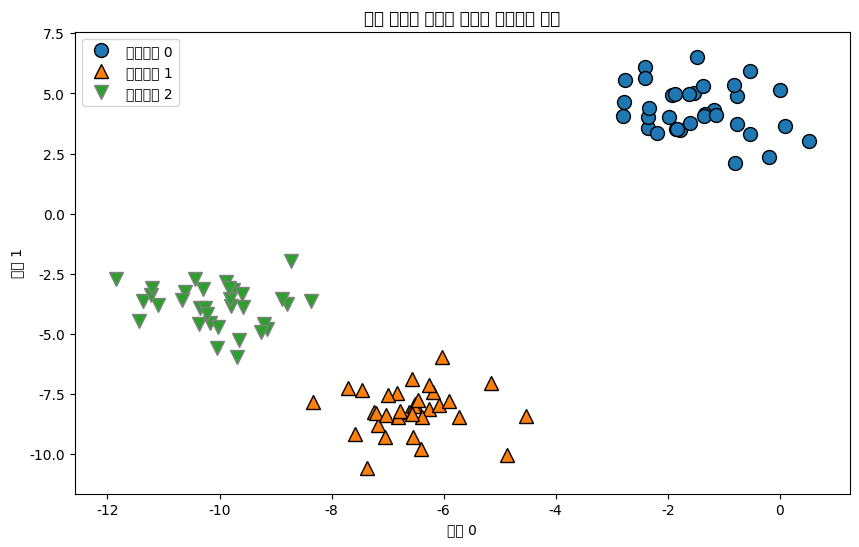

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)

plt.title('병합 군집을 사용한 세개의 클러스터 할당')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.show()

#### 계층적 군집과 덴드로그램(dendrograms)

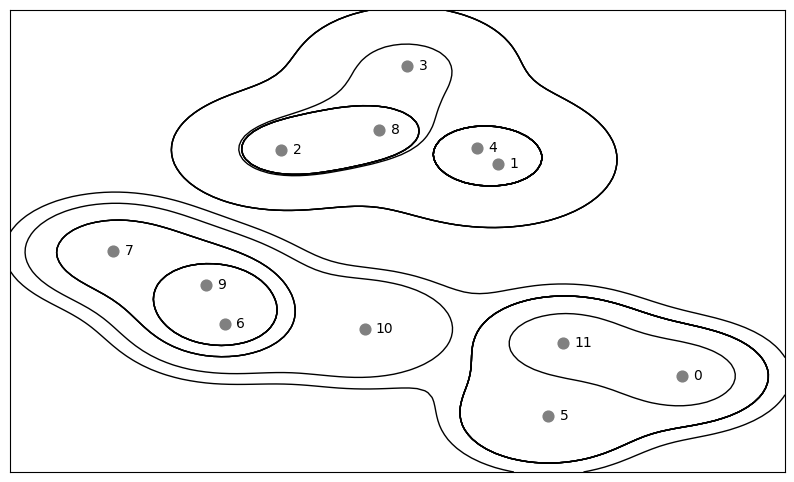

In [ ]:
# 병합 군집으로 생성한 계층적 군집
mglearn.plots.plot_agglomerative()

In [ ]:
# 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

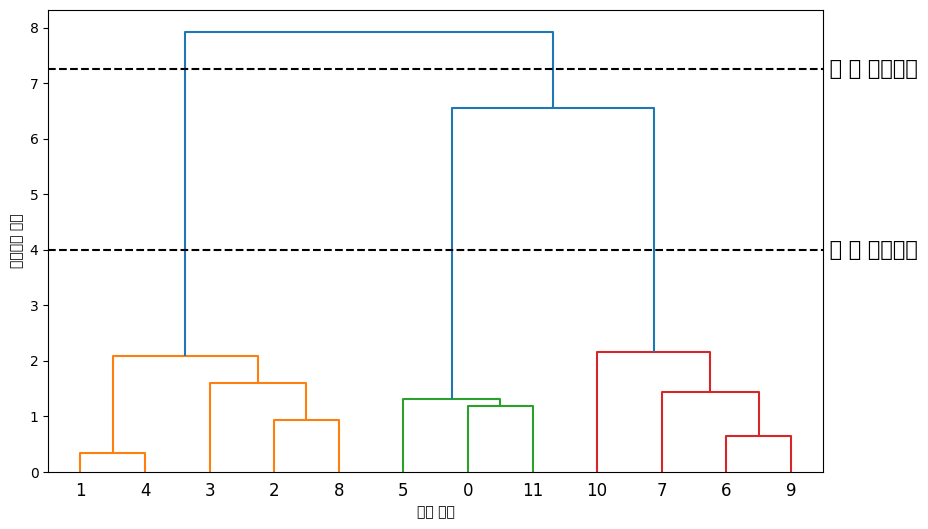

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

# 덴드로 그램
linkage_array = ward(X)
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})

plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
plt.show()

## GMM(Gaussian Mixture Model)
[GMM](https://untitledtblog.tistory.com/133)
- 확률 기반 군집 알고리즘  
* 여러개의 확률 분포(그룹)를 그려두고 임의의 점이 어느 확률분포에 위치할 때 y값(확률)이 커지느냐를 비교하여 그룹을 선정  

In [ ]:
# 무작위로 클러스터 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

In [ ]:
# 세개의 클러스터로 GMM 알고리즘 적용
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X).predict(X)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

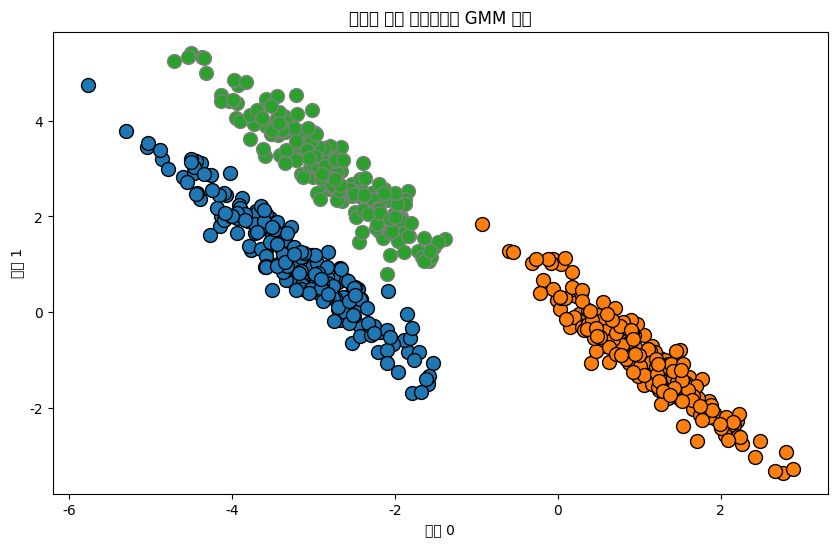

In [ ]:
# 클러스터 할당 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], gmm_label, markers='o')

plt.title('원형이 아닌 클러스터에 GMM 적용')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

## DBSCAN(밀도 기반)
[DBSCAN](https://bcho.tistory.com/1205)  
* 하나의 데이터를 기준으로 epsilon이라는 원형 영역을 그려놓고, 그 안에 데이터가 몇 개 이상 들어가면 중심 데이터를 그룹의 중심점으로 인정해주는 밀도 기반의 형식  

* 엡실론(원의 크기)과 최소 갯수 두가지의 하이퍼 파라미터를 정해줘야 하는 단점이 있음.  
원이 클수록 러프하고 작을수록 세세하게 나누겠지?  

* 간혹 코어 데이터도 아니고, 어느 그룹에 속한 데이터도 아닌 뭣도 아닌 Nosie point 데이터가 생길 때가 있음.  
그룹 넘버인 0, 1, 2식으로 표현되는게 아니라 마이너스로 표현됨.  

---

#### 옵션
- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

---

#### 포인트 구분
- 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있는 데이터 포인트
- 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터 포인트
- 경계 포인트(Border Point): 핵심 포인트를 이웃 포인트로 가지고 있는 데이터 포인트
- 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않고 핵심 포인트를 이웃 포인트로도 가지고 있지 않은 데이터 포인트

### DBSCAN 적용

In [ ]:
# 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print('클러스터 레이블:\n', clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


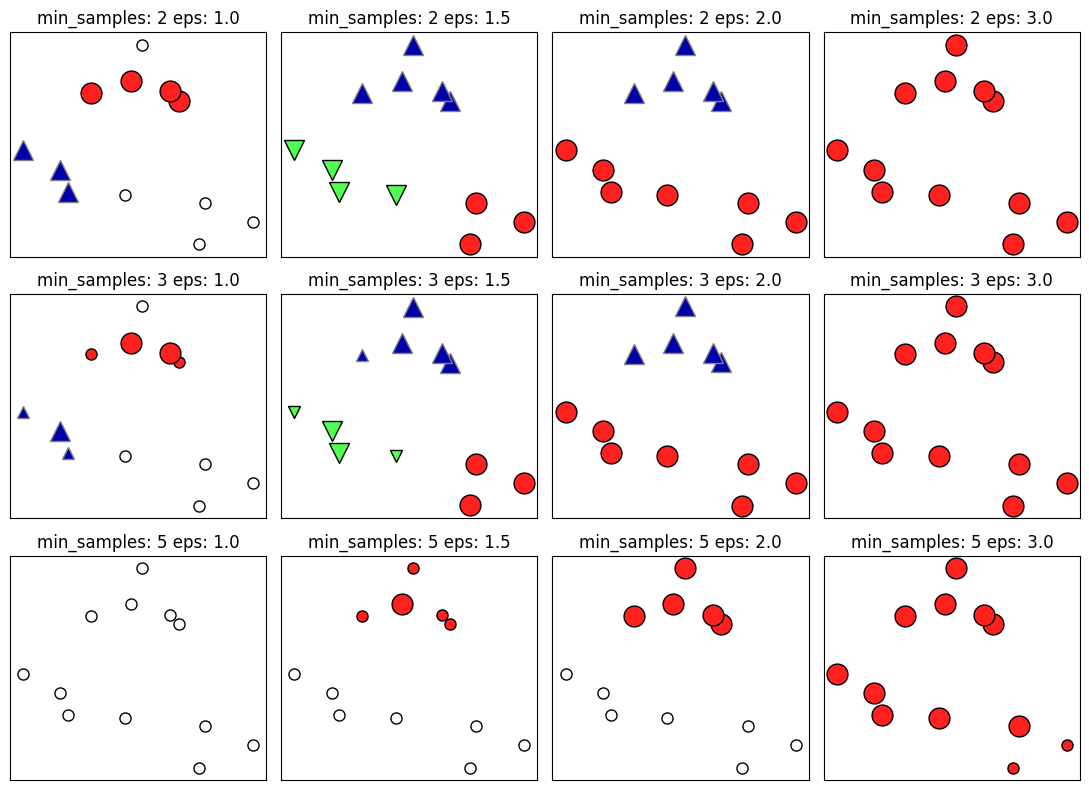

In [ ]:
# min_samples, eps 옵션에 따른 포인트 표시
mglearn.plots.plot_dbscan()

### DBSCAN 적용 - 데이터 스케일링

In [ ]:
# 데이터 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [ ]:
# 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

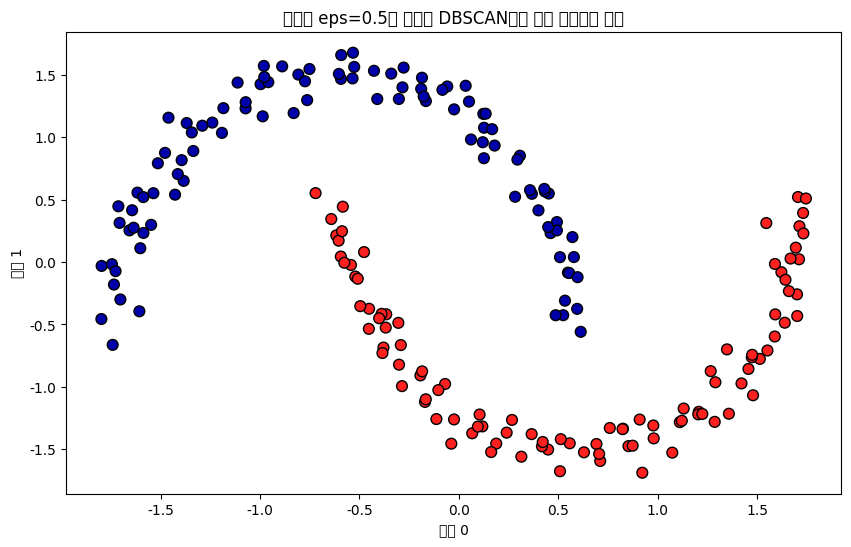

In [ ]:
# 클러스터 할당 시각화

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

plt.title('기본값 eps=0.5를 사용해 DBSCAN으로 찾은 클러스터 할당')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

### DBSCAN 적용 - 원형 데이터

In [ ]:
# 데이터 생성
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
clusters = dbscan.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

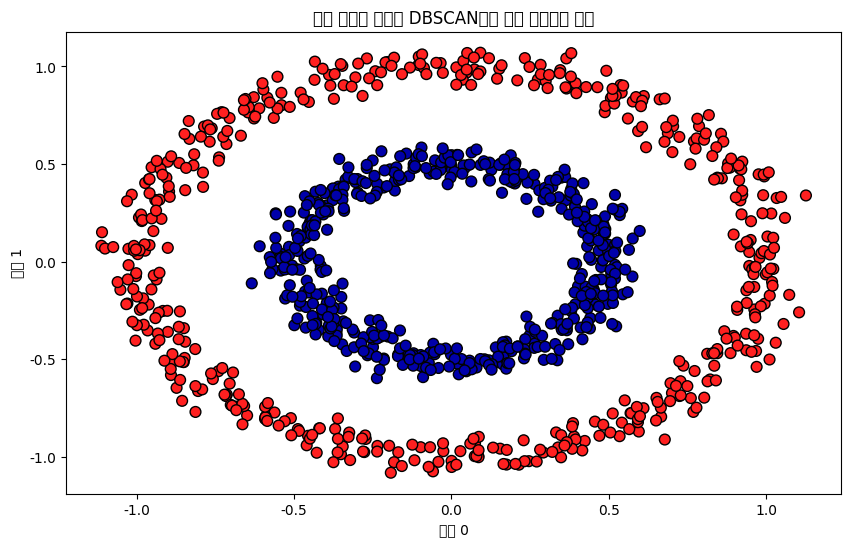

In [ ]:
# 클러스터 할당 시각화

plt.scatter(X[:,0], X[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

plt.title('원형 데이터 분포를 DBSCAN으로 찾은 클러스터 할당')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

## 군집 알고리즘 평가

### 타겟값이 있는 경우
- ARI(Adjusted Rand Index)
- NMI(Normalized Mutual Information)

In [ ]:
# 데이터 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [ ]:
# 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics.cluster import adjusted_rand_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45817 (

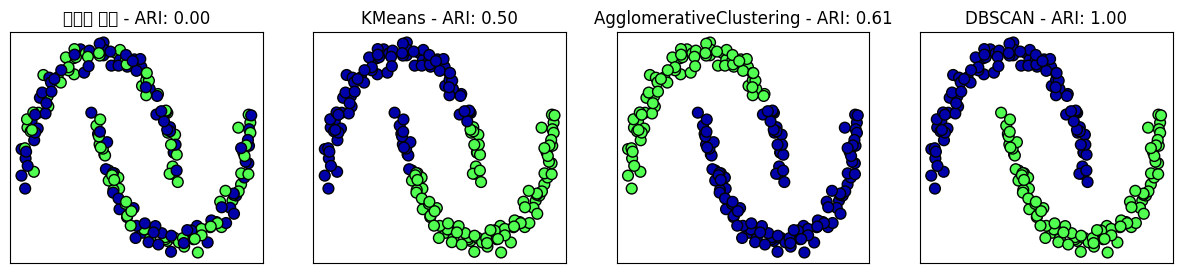

In [ ]:
# 군집 알고리즘 별 평가 - ARI

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

### 정확도 - ARI 비교

In [ ]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# 모든 레이블이 달라졌으므로 정확도는 0입니다
print('정확도: {:.2f}'.format(accuracy_score(clusters1, clusters2)))

# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


### 타겟값이 없는 경우
- 실루엣 계수(Silhouette Coefficient)  

A그룹의 중심으로부터 A그룹 내의 데이터 간 거리의 평균을 구하고, A그룹의 중심으로부터 B그룹 내의 데이터 간 거리의 평균을 구한다.

전자 분의 후자를 했을 때 값이 커질 수록 A와 B를 더 잘 나눴다는게 된다.  

평균이 과연 전체를 대표할 수 있는지와 거리 기반이라는 점에서 원형이 아니면 평가의 성능이 좋지 못하다는 단점이 있다.

In [ ]:
# 데이터 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [ ]:
# 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.metrics.cluster import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45817 (

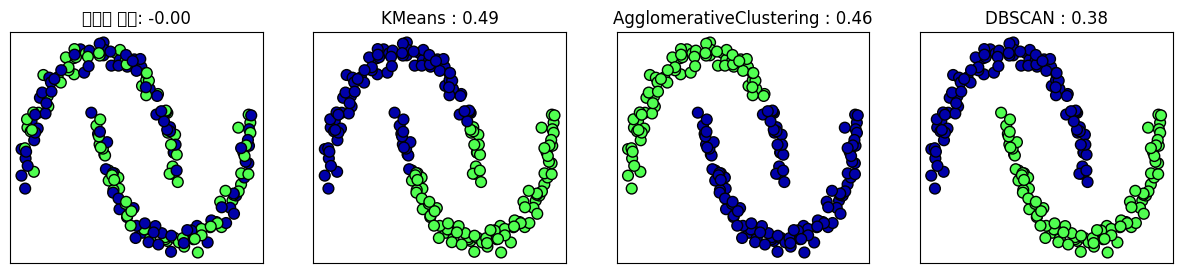

In [ ]:
# 군집 알고리즘 별 평가 - Silhouette Coefficient

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당: {:.2f}'.format(silhouette_score(X_scaled, random_clusters)))

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} : {:.2f}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

## LCA
- 목표: 관측된 데이터가 여러 잠재적인 집단(클래스)으로 나뉜다고 가정하고, 이 집단들을 추정하여 데이터를 분석합니다. 각 데이터 포인트가 어떤 잠재적인 집단에 속할 확률을 추정합니다.
- 잠재 변수: LCA에서는 잠재 변수를 사용하여 관측된 데이터의 이면에 있는 집단 구조를 모델링합니다. 잠재 변수는 데이터의 숨겨진 구조를 반영하며, 직접적으로 관측할 수는 없습니다.
- 모델: LCA는 각 클래스의 확률 분포를 추정하고, 데이터 포인트가 각 클래스에 속할 확률을 추정합니다. 이를 통해 데이터가 다양한 잠재적 그룹으로 나뉘어 있을 수 있음을 식별합니다.  
- 확률 변수를 이용하기에 최대우도값에 따라 모델을 평가하는 AIC, BIC가 LCA 모델 평가 기준이 된다. AIC, BIC가 낮을수록 좋다.

[LCA Code](https://github.com/8orrin9/LCA-Latent-Class-Analysis-.git)